In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings("ignore")

In [95]:
df=pd.read_csv("titanic.csv")
df.shape

(891, 12)

In [96]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Sorting in descending order to look good
#### Treating Missing Values

In [98]:
df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [99]:
df.drop(['Cabin'],axis=1, inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [100]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

#### We will replace missing value in Embarked with MODE i.e. S

In [101]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [102]:
df.Embarked.mode()[0]

'S'

In [103]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace=True)
df.isna().sum().sort_values(ascending=False)

Age            177
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

#### Now we will treat AGE

In [104]:
df.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

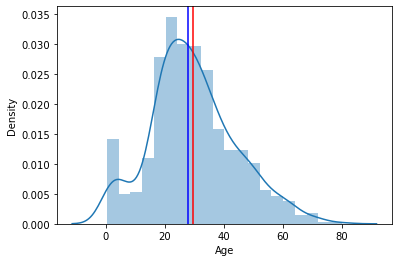

In [105]:
sns.distplot(df.Age)
plt.axvline(df.Age.mean(), color='r')
plt.axvline(df.Age.median(), color='b')
plt.show()

In [106]:
df.Age.mean()

29.69911764705882

In [107]:
df.Age.fillna(df.Age.mean(), inplace=True)
df.isna().sum().sort_values(ascending=False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Feature Engineering

In [108]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [109]:
df.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [110]:
df.SibSp.value_counts(normalize = True)*100

0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64

In [111]:
df.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [112]:
df.Parch.value_counts(normalize = True)*100

0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64

#### Deriving a feature Family_Size out Sibling-Spouse and Parent-Children

In [113]:
df['Family_Size']= df.SibSp + df.Parch + 1

In [114]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [115]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size
95,96,0,3,"Shorney, Mr. Charles Joseph",male,29.699118,0,0,374910,8.0500,S,1
364,365,0,3,"O'Brien, Mr. Thomas",male,29.699118,1,0,370365,15.5000,Q,2
519,520,0,3,"Pavlovic, Mr. Stefo",male,32.000000,0,0,349242,7.8958,S,1


In [116]:
df['Gender_Class']= df.apply(lambda x : 'child' if x['Age']<15 else x['Sex'], axis = 1 )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,male


In [117]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_Size,Gender_Class
735,736,0,3,"Williams, Mr. Leslie",male,28.5,0,0,54636,16.1000,S,1,male
313,314,0,3,"Hendekovic, Mr. Ignjac",male,28.0,0,0,349243,7.8958,S,1,male
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C,1,female


In [118]:
df.shape

(891, 13)

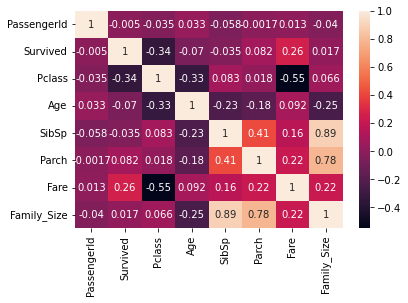

In [119]:
sns.heatmap(df.corr(), annot = True)
plt.show()

In [120]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Family_Size', 'Gender_Class'],
      dtype='object')

In [121]:
df.drop(['PassengerId', 'Name','Sex','SibSp','Parch','Ticket'], axis=1, inplace=True)

In [122]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'Fare', 'Embarked', 'Family_Size',
       'Gender_Class'],
      dtype='object')

In [123]:
df.head()

,Survived,Pclass,Age,Fare,Embarked,Family_Size,Gender_Class
0,0,3,22.0,7.2500,S,2,male
1,1,1,38.0,71.2833,C,2,female
2,1,3,26.0,7.9250,S,1,female
3,1,1,35.0,53.1000,S,2,female
4,0,3,35.0,8.0500,S,1,male


### Dumification or One Hot Encoding

In [124]:
df= pd.get_dummies(df, columns=['Gender_Class','Embarked'], drop_first=True)
df.shape

(891, 9)

In [125]:
df.head()

,Survived,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,2,0,1,0,1
1,1,1,38.0,71.2833,2,1,0,0,0
2,1,3,26.0,7.9250,1,1,0,0,1
3,1,1,35.0,53.1000,2,1,0,0,1
4,0,3,35.0,8.0500,1,0,1,0,1


In [126]:
df.describe()

,Survived,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208,1.904602,0.308642,0.603816,0.086420,0.725028
std,0.486592,0.836071,13.002015,49.693429,1.613459,0.462192,0.489378,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,7.910400,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,31.000000,2.000000,1.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,11.000000,1.000000,1.000000,1.000000,1.000000


### Preparing X and y

In [127]:
X = df.loc[: , df.columns!='Survived']
X.head()

,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
0,3,22.0,7.2500,2,0,1,0,1
1,1,38.0,71.2833,2,1,0,0,0
2,3,26.0,7.9250,1,1,0,0,1
3,1,35.0,53.1000,2,1,0,0,1
4,3,35.0,8.0500,1,0,1,0,1


In [128]:
y=df.Survived

In [129]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [130]:
X.shape

(891, 8)

### Splitting X and y into Training and Testing for Model Selection

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [133]:
print(X_train.shape,'   ||   ',X_test.shape)
print(y_train.shape,'   ||   ',y_test.shape)

(712, 8)    ||    (179, 8)
(712,)    ||    (179,)


#### Scaling needs to be done for Numerical Columns

In [134]:
numeric_cols = ['Age','Fare']

In [135]:
numeric_cols

['Age', 'Fare']

In [136]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train[['Age','Fare']]= sc.fit_transform(X_train[numeric_cols])
X_test[['Age','Fare']]= sc.transform(X_test[numeric_cols])

In [137]:
X_train.head()

,Pclass,Age,Fare,Family_Size,Gender_Class_female,Gender_Class_male,Embarked_Q,Embarked_S
140,3,-0.002824,-0.331679,3,1,0,0,0
439,2,0.096629,-0.426405,1,0,1,0,1
817,2,0.096629,0.102620,3,0,1,0,0
378,3,-0.744332,-0.555896,1,0,1,0,0
491,3,-0.667881,-0.491276,1,0,1,0,1


<AxesSubplot:xlabel='Age', ylabel='Density'>

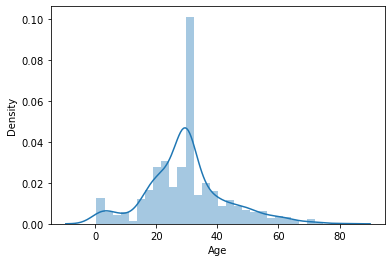

In [138]:
sns.distplot(df.Age)

<AxesSubplot:xlabel='Fare', ylabel='Density'>

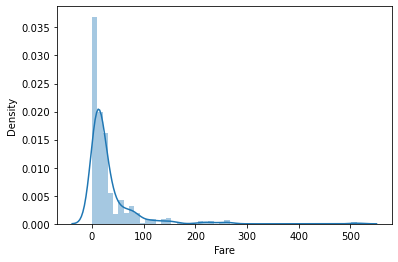

In [139]:
sns.distplot(df.Fare)

### Logistic Regression

In [141]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

### Prediction

In [142]:
y_pred_train=log_reg.predict(X_train)
y_pred_test=log_reg.predict(X_test)

### Model Evaluation

In [143]:
from sklearn.metrics import accuracy_score
print('Training Accuracy:', accuracy_score(y_train,y_pred_train))
print('Testing Accuracy:', accuracy_score(y_test,y_pred_test))

Training Accuracy: 0.824438202247191
Testing Accuracy: 0.8156424581005587


In [145]:
from sklearn.metrics import confusion_matrix
print('Training Confusion Metrics:\n', confusion_matrix(y_train,y_pred_train))
print('Testing Confusion Metrics:\n', confusion_matrix(y_test,y_pred_test))

Training Confusion Metrics:
 [[388  51]
 [ 74 199]]
Testing Confusion Metrics:
 [[95 15]
 [18 51]]


In [147]:
train_accuracy= (388+199) / (388+51+74+199)
train_accuracy

0.824438202247191

In [149]:
test_accuracy= (95+51) / (95+15+18+51)
test_accuracy

0.8156424581005587

In [150]:
from sklearn.metrics import precision_score
print('Training Precision Score:', precision_score(y_train,y_pred_train))
print('Testing Precision Score:', precision_score(y_test,y_pred_test))

Training Precision Score: 0.796
Testing Precision Score: 0.7727272727272727


In [151]:
from sklearn.metrics import recall_score
print('Training Recall Score:', recall_score(y_train,y_pred_train))
print('Testing Recall Score:', recall_score(y_test,y_pred_test))

Training Recall Score: 0.7289377289377289
Testing Recall Score: 0.7391304347826086


In [154]:
from sklearn.metrics import f1_score
print('Training F1 Score:', f1_score(y_train,y_pred_train))
print('Testing F1 Score:', f1_score(y_test,y_pred_test))

Training F1 Score: 0.7609942638623328
Testing F1 Score: 0.7555555555555555


In [155]:
from sklearn.metrics import classification_report
print('Training Classification Report:', classification_report(y_train,y_pred_train))
print('Testing Classification Report:', classification_report(y_test,y_pred_test))

Training Classification Report:               precision    recall  f1-score   support

           0       0.84      0.88      0.86       439
           1       0.80      0.73      0.76       273

    accuracy                           0.82       712
   macro avg       0.82      0.81      0.81       712
weighted avg       0.82      0.82      0.82       712

Testing Classification Report:               precision    recall  f1-score   support

           0       0.84      0.86      0.85       110
           1       0.77      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

